
# Análise de Dados: Aprendizado de Máquina, Regressão
---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, irei utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
penguim = sns.load_dataset('penguins')

In [4]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilizei os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. 

 - Atributos por sexo:

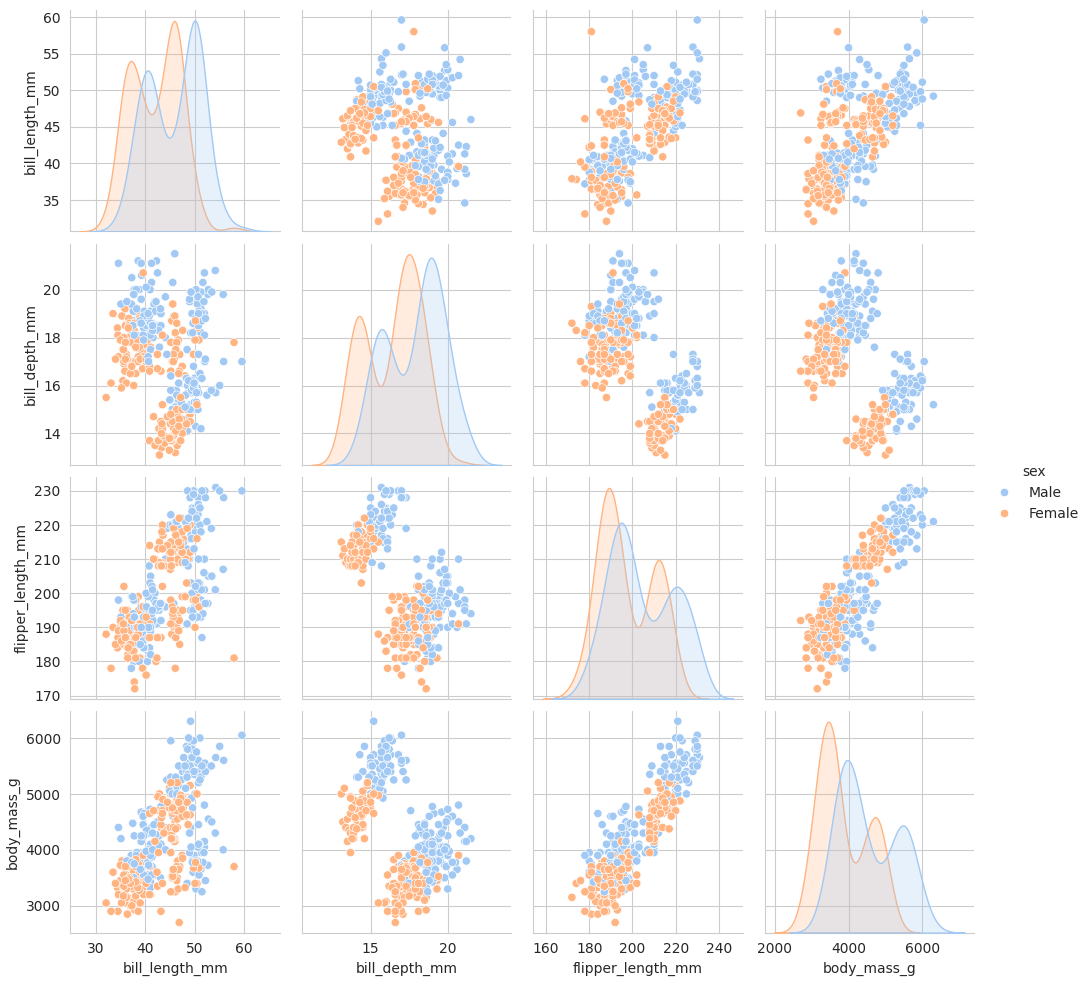

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** Tanto os machos quanto as fêmeas apresentam um comportamento semelhante: um subida, uma queda, uma subida menor e depois outra queda; mas, nos machos, esse padrão aparece quando, no gráfico, números maiores são atingidos.

 - Atributos por espécie:

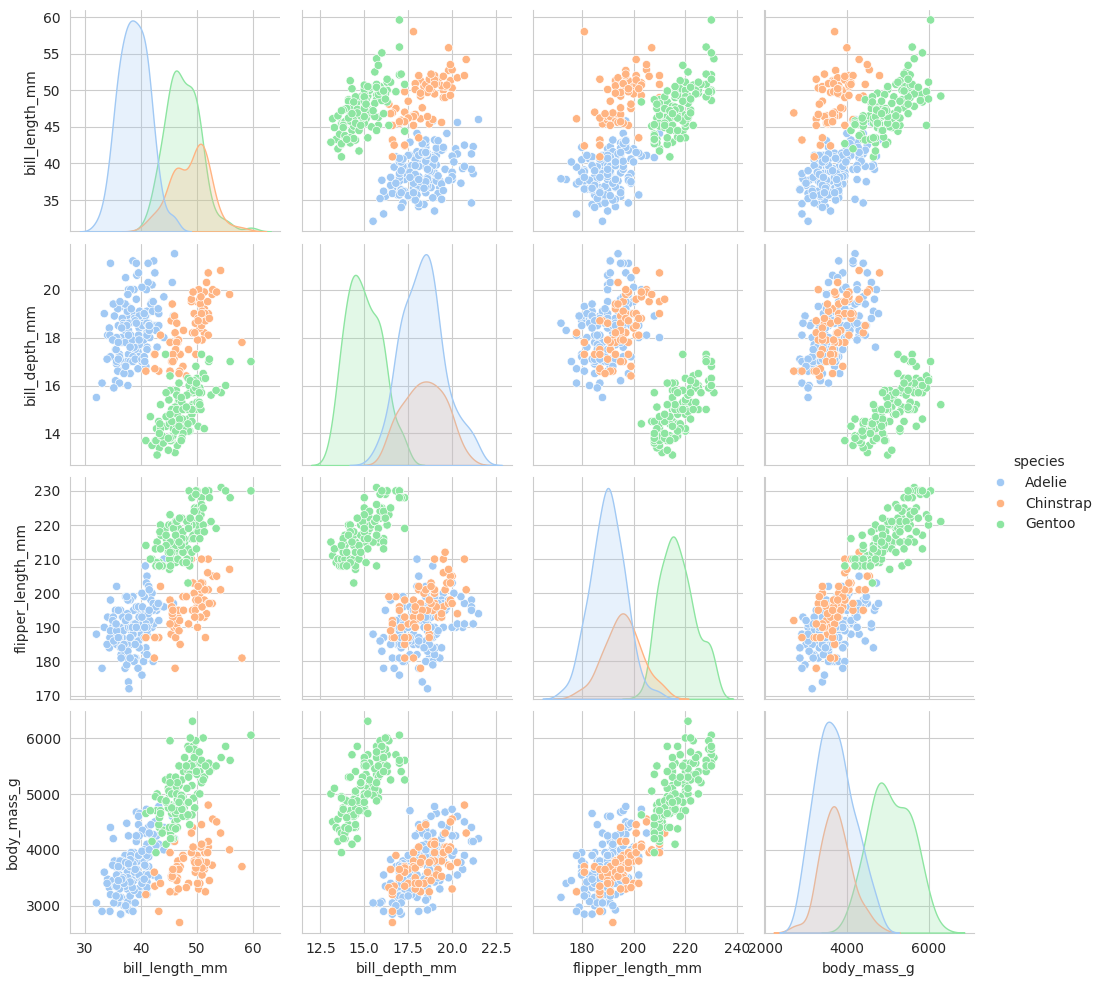

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** As espécies Adelie e Chinstrap apresentam comportamento semelhante na maioria dos gráficos, porém há uma maior expressividade nos indivíduos da espécie Adelie do que os da espécie Chistrap.

 - Atributos por ilha:

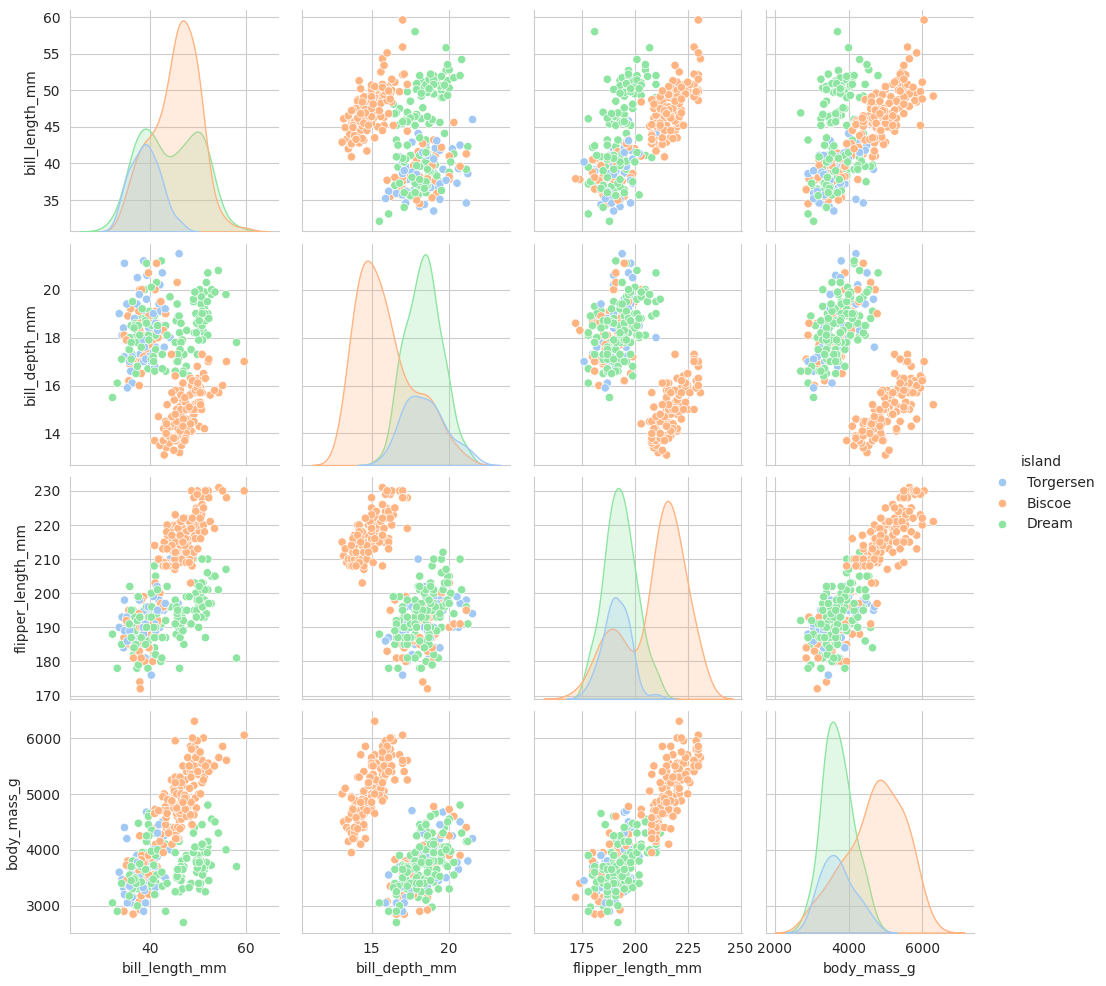

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** Os indivíduos das ilhas Dream e Torgersen apresentam comportamento semelhante na maioria dos gráficos, porém há uma maior expressividade nos indivíduos da ilha Dream do que os da espécie Torgersen.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, irei tratar.

In [8]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
penguim.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Temos valores nulos em 5 colunas.

### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

In [10]:
# Identificar colunas numéricas
numeric_cols = penguim.select_dtypes(include=np.number).columns

# Verificar valores faltantes nas colunas numéricas
missing_values = penguim[numeric_cols].isnull().sum()

# Preencher valores faltantes com a média
for col in numeric_cols:
    col_name_std = col + "_std"
    mean_value = penguim[col].mean()
    penguim[col_name_std] = penguim[col].fillna(mean_value)

# Verificar as primeiras linhas do penguimframe com as novas colunas com valores preenchidos
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,39.10000,18.70000,181.000000,3750.000000
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,39.50000,17.40000,186.000000,3800.000000
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,40.30000,18.00000,195.000000,3250.000000
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,43.92193,17.15117,200.915205,4201.754386
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,36.70000,19.30000,193.000000,3450.000000


In [11]:
penguim.isnull().sum()

species                   0
island                    0
bill_length_mm            2
bill_depth_mm             2
flipper_length_mm         2
body_mass_g               2
sex                      11
bill_length_mm_std        0
bill_depth_mm_std         0
flipper_length_mm_std     0
body_mass_g_std           0
dtype: int64

As colunas com variaveis numericas faltantes foram prenchidas com a média.

### **2.3. Variáveis categóricas** 

Identifiquei as variáveis categóricas nominais e ordinais, criei uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve tem o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

In [12]:
penguim.dtypes

species                   object
island                    object
bill_length_mm           float64
bill_depth_mm            float64
flipper_length_mm        float64
body_mass_g              float64
sex                       object
bill_length_mm_std       float64
bill_depth_mm_std        float64
flipper_length_mm_std    float64
body_mass_g_std          float64
dtype: object

In [13]:
# Identificar colunas categóricas
categorical_cols = penguim.select_dtypes(include=['object']).columns

In [14]:
# Conversão das variáveis categóricas nominais
for col in ['sex','species','island']:
    col_name_nom = col + "_nom"
    penguim[col_name_nom] = pd.Categorical(penguim[col]).codes

# Verificar as primeiras linhas do penguimframe com as novas colunas de variáveis categóricas nominais
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_nom,species_nom,island_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,39.10000,18.70000,181.000000,3750.000000,1,0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,39.50000,17.40000,186.000000,3800.000000,0,0,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,40.30000,18.00000,195.000000,3250.000000,0,0,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,43.92193,17.15117,200.915205,4201.754386,-1,0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,36.70000,19.30000,193.000000,3450.000000,0,0,2


In [15]:
# Mapeamento para 'sex'
valores_sex = penguim['sex'].unique()
codigos_sex = penguim['sex_nom'].unique()
mapeamento_sex = dict(zip(codigos_sex,valores_sex))

# Mapeamento para 'species'
valores_species = penguim['species'].unique()
codigos_species = penguim['species_nom'].unique()
mapeamento_species = dict(zip(codigos_species, valores_species))

# Mapeamento para 'island'
valores_island = penguim['island'].unique()
codigos_island = penguim['island_nom'].unique()
mapeamento_island = dict(zip(codigos_island, valores_island))

# Imprimir os mapeamentos
print("Mapeamento para a coluna 'species':")
print(mapeamento_species)

print("\nMapeamento para a coluna 'island':")
print(mapeamento_island)

print("\nMapeamento para a coluna 'sex':")
print(mapeamento_sex)

Mapeamento para a coluna 'species':
{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

Mapeamento para a coluna 'island':
{2: 'Torgersen', 0: 'Biscoe', 1: 'Dream'}

Mapeamento para a coluna 'sex':
{1: 'Male', 0: 'Female', -1: nan}


Lidei com a variáveis categóricas usando codigos (1,0 e -1).

### **2.4. Limpeza** 

Descartei as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [16]:
# Criar lista com os sufixos das colunas que queremos manter
sufixos = ['_std', '_nom']

# Criar lista com as colunas que queremos manter
colunas_mantidas = [col for col in penguim.columns if any(col.endswith(sufixo) for sufixo in sufixos)]

# Adicionar a variável resposta à lista de colunas mantidas
#colunas_mantidas.append('species')
#colunas_mantidas.append('island')
# Criar um novo dataframe com as colunas desejadas
data_final = penguim[colunas_mantidas]

# Verificar as primeiras linhas do novo dataframe
data_final.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_nom,species_nom,island_nom
0,39.10000,18.70000,181.000000,3750.000000,1,0,2
1,39.50000,17.40000,186.000000,3800.000000,0,0,2
2,40.30000,18.00000,195.000000,3250.000000,0,0,2
3,43.92193,17.15117,200.915205,4201.754386,-1,0,2
4,36.70000,19.30000,193.000000,3450.000000,0,0,2


In [17]:
data_final.isnull().sum()

bill_length_mm_std       0
bill_depth_mm_std        0
flipper_length_mm_std    0
body_mass_g_std          0
sex_nom                  0
species_nom              0
island_nom               0
dtype: int64

In [18]:
data_final.dtypes

bill_length_mm_std       float64
bill_depth_mm_std        float64
flipper_length_mm_std    float64
body_mass_g_std          float64
sex_nom                     int8
species_nom                 int8
island_nom                  int8
dtype: object

### **2.5. Treino/Teste** 

Usarei o modelo de regressão linear que busca modelar a relação entre uma variável dependente e uma ou mais variáveis independentes.A ideia básica por trás da regressão linear é encontrar a "melhor" linha reta que descreve a relação entre as variáveis.

y=mx+b
- y é a variável dependente que queremos prever.
- x é a variável independente.
- m é o coeficiente angular da reta, que representa a inclinação da reta.
- b é o coeficiente linear, que representa o ponto onde a linha intercepta o eixo y quando x = 0

In [19]:
from sklearn.model_selection import train_test_split

Separando a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [20]:
data_final.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_nom,species_nom,island_nom
0,39.10000,18.70000,181.000000,3750.000000,1,0,2
1,39.50000,17.40000,186.000000,3800.000000,0,0,2
2,40.30000,18.00000,195.000000,3250.000000,0,0,2
3,43.92193,17.15117,200.915205,4201.754386,-1,0,2
4,36.70000,19.30000,193.000000,3450.000000,0,0,2


In [21]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data_final.drop(['body_mass_g_std'], axis=1), 
    data_final['body_mass_g_std'], 
    test_size=0.33, 
    random_state=123
)

print(f'predictors_train.shape = {predictors_train.shape}')
print(f'predictors_test.shape = {predictors_test.shape}')
print(f'target_train.shape = {target_train.shape}')
print(f'target_test.shape = {target_test.shape}')

predictors_train.shape = (230, 6)
predictors_test.shape = (114, 6)
target_train.shape = (230,)
target_test.shape = (114,)


## 3\. Modelagem 

### **3.1. Treino** 

Treinando um modelo de **regressão linear** com os **dados de treino** (2/3).

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model = model.fit(predictors_train, target_train)

In [25]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'sex_nom', 'species_nom', 'island_nom'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([ -10.17711419,  -18.89101771,   35.95932677,  471.31414849,
         159.3539802 , -111.2248553 ]),
 'rank_': 6,
 'singular_': array([216.48484823,  61.74947466,  24.06631356,   8.3539571 ,
          6.0455606 ,   4.06233929]),
 'intercept_': -2519.993484422618}

In [26]:
a = model.coef_
print(a)

[ -10.17711419  -18.89101771   35.95932677  471.31414849  159.3539802
 -111.2248553 ]


In [27]:
b = model.intercept_
print(b)

-2519.993484422618


### **3.2. Avaliação** 

Calculando o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
target_predicted = model.predict(predictors_test)

In [30]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
rmse

381.5221918696774

## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm |---| sex |
| --- | --- |---| --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 |---| Male |

In [31]:
data_final.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_nom,species_nom,island_nom
0,39.10000,18.70000,181.000000,3750.000000,1,0,2
1,39.50000,17.40000,186.000000,3800.000000,0,0,2
2,40.30000,18.00000,195.000000,3250.000000,0,0,2
3,43.92193,17.15117,200.915205,4201.754386,-1,0,2
4,36.70000,19.30000,193.000000,3450.000000,0,0,2


In [32]:
# bill_length_mm

media_bill_length = data_final['bill_length_mm_std'].mean()
print(media_bill_length)

desvio_padrao_bill_length = data_final['bill_length_mm_std'].std()
print(desvio_padrao_bill_length)

data_final = data_final.copy()

data_final['bill_length_mm_std'] = data_final['bill_length_mm_std'].apply(lambda b_l_mm: (b_l_mm - media_bill_length) / desvio_padrao_bill_length)


43.92192982456141
5.443643289499353


In [33]:
# bill_depth_mm

media_bill_depth = data_final['bill_depth_mm_std'].mean()
print(media_bill_depth)

desvio_padrao_bill_depth = data_final['bill_depth_mm_std'].std()
print(desvio_padrao_bill_depth)

data_final = data_final.copy()

data_final['bill_depth_mm_std'] = data_final['bill_depth_mm_std'].apply(lambda b_d_mm: (b_d_mm - media_bill_depth) / desvio_padrao_bill_depth)

17.151169590643274
1.9690273250748396


In [34]:
# flipper_length_mm

media_flipper_length = data_final['flipper_length_mm_std'].mean()
print(media_flipper_length)

desvio_padrao_flipper_length = data_final['flipper_length_mm_std'].std()
print(desvio_padrao_flipper_length)

data_final = data_final.copy()

data_final['flipper_length_mm_std'] = data_final['flipper_length_mm_std'].apply(lambda f_l_mm: (f_l_mm - media_flipper_length) / desvio_padrao_flipper_length)
     

200.91520467836258
14.020657493397026


In [35]:
# body_mass_g

media_body_mass = data_final['body_mass_g_std'].mean()
print(media_body_mass)

desvio_padrao_body_mass = data_final['body_mass_g_std'].std()
print(desvio_padrao_body_mass)

data_final = data_final.copy()

data_final['body_mass_g_std'] = data_final['body_mass_g_std'].apply(lambda b_m_g: (b_m_g - media_body_mass) / desvio_padrao_body_mass)
     

4201.754385964912
799.6130576037641


In [36]:
bill_length_mm_padronizada = (38.2 - media_bill_length) / desvio_padrao_bill_length
bill_length_mm_padronizada

-1.0511213759356461

In [37]:
bill_depth_mm_padronizada = (18.1 - media_bill_depth) / desvio_padrao_bill_depth
bill_depth_mm_padronizada

0.4818777257551079

In [38]:
flipper_length_mm_padronizada = (185.0 - media_flipper_length) / desvio_padrao_flipper_length
flipper_length_mm_padronizada

-1.1351254166117237

In [39]:
novo_penguim = np.array([bill_length_mm_padronizada, bill_depth_mm_padronizada, flipper_length_mm_padronizada, 1, 0, 0])

novo_penguim

array([-1.05112138,  0.48187773, -1.13512542,  1.        ,  0.        ,
        0.        ])

In [40]:
peso_penguim_padronizado = model.predict(novo_penguim.reshape(1, -1))
peso_penguim_padronizado

c:\Users\Gabriel Canuto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2087.9034601])

| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm |body_mass| sex |
| --- | --- |---| --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 |3783.79| Male |

In [41]:
peso_penguim = -0.52270369 * desvio_padrao_body_mass + media_body_mass
print('O novo penguim pesa: ',peso_penguim)

O novo penguim pesa:  3783.7936901832422


---